In [113]:
# Import Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import linear_model, metrics 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score 
import xgboost as xgb

In [91]:
# Reading datasets and storing them in a dataframe
train_data = pd.read_csv('C:/Users/hp/Desktop/EAI 6000 Project/Features_Variant_1.csv')

In [93]:
# Defining the columns for the dataset attributes
train_data.columns = ['Comments','Checkins','TalkingAbout','Category','Derived5','Derived6','Derived7','Derived8','Derived9','Derived10','Derived11','Derived12','Derived13','Derived14','Derived15','Derived16','Derived17','Derived18','Derived19','Derived20','Derived21','Derived22','Derived23','Derived24','Derived25','Derived26','Derived27','Derived28','Derived29','CC1','CC2','CC3','CC4','CC5','BaseTime','PostLength','PostShareCount','PostPromotionStatus','HLocal','PostPublishedWeekday40','Post PublishedWeekday 41','Post published weekday42','Post published weekday43','Post published weekday44','Post published weekday45','Post published weekday46','Base DateTime weekday47','Base DateTime weekday48','Base DateTime weekday49','Base DateTime weekday50','Base DateTime weekday51','Base DateTime weekday52','Base DateTime weekday53','Targets']

In [94]:
# Describing the dataset
train_data.describe()

,Comments,Checkins,TalkingAbout,Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,Post published weekday45,Post published weekday46,Base DateTime weekday47,Base DateTime weekday48,Base DateTime weekday49,Base DateTime weekday50,Base DateTime weekday51,Base DateTime weekday52,Base DateTime weekday53,Targets
count,4.094800e+04,40948.000000,4.094800e+04,40948.000000,40948.000000,40948.000000,40948.000000,40948.000000,40948.000000,40948.000000,...,40948.000000,40948.000000,40948.000000,40948.000000,40948.000000,40948.000000,40948.000000,40948.000000,40948.000000,40948.000000
mean,1.313830e+06,4676.247949,4.480133e+04,24.255348,1.586280,443.324998,55.721469,35.646381,67.464077,0.219473,...,0.146161,0.136930,0.141643,0.132510,0.137638,0.148603,0.150850,0.143890,0.144867,7.323068
std,6.785834e+06,20593.423357,1.109349e+05,19.950496,20.753426,496.698029,86.934332,69.960877,81.569243,10.055268,...,0.353272,0.343777,0.348688,0.339048,0.344524,0.355701,0.357907,0.350982,0.351971,35.494965
min,3.600000e+01,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.673400e+04,0.000000,6.980000e+02,9.000000,0.000000,45.000000,5.527273,2.000000,8.278756,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.929110e+05,0.000000,7.141000e+03,18.000000,0.000000,241.000000,23.374101,12.000000,35.069140,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.204214e+06,99.000000,5.026400e+04,32.000000,0.000000,717.000000,71.828829,42.000000,102.554953,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.869723e+08,186370.000000,6.089942e+06,106.000000,2341.000000,2341.000000,2341.000000,2341.000000,731.394558,1923.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1305.000000


In [95]:
# To get the info of the training dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40948 entries, 0 to 40947
Data columns (total 54 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Comments                  40948 non-null  int64  
 1   Checkins                  40948 non-null  int64  
 2   TalkingAbout              40948 non-null  int64  
 3   Category                  40948 non-null  int64  
 4   Derived5                  40948 non-null  int64  
 5   Derived6                  40948 non-null  int64  
 6   Derived7                  40948 non-null  float64
 7   Derived8                  40948 non-null  float64
 8   Derived9                  40948 non-null  float64
 9   Derived10                 40948 non-null  int64  
 10  Derived11                 40948 non-null  int64  
 11  Derived12                 40948 non-null  float64
 12  Derived13                 40948 non-null  float64
 13  Derived14                 40948 non-null  float64
 14  Derive

In [56]:
# Testing for the null values in all the datasets
train_data.isnull().sum()

Comments                    0
Checkins                    0
TalkingAbout                0
Category                    0
Derived5                    0
Derived6                    0
Derived7                    0
Derived8                    0
Derived9                    0
Derived10                   0
Derived11                   0
Derived12                   0
Derived13                   0
Derived14                   0
Derived15                   0
Derived16                   0
Derived17                   0
Derived18                   0
Derived19                   0
Derived20                   0
Derived21                   0
Derived22                   0
Derived23                   0
Derived24                   0
Derived25                   0
Derived26                   0
Derived27                   0
Derived28                   0
Derived29                   0
CC1                         0
CC2                         0
CC3                         0
CC4                         0
CC5       

In [98]:
# Computing correlationamen between different columns in the same dataframe
train_data.corr().head()

,Comments,Checkins,TalkingAbout,Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,Post published weekday45,Post published weekday46,Base DateTime weekday47,Base DateTime weekday48,Base DateTime weekday49,Base DateTime weekday50,Base DateTime weekday51,Base DateTime weekday52,Base DateTime weekday53,Targets
Comments,1.000000,0.044838,0.623436,-0.042171,0.059575,0.158716,0.166424,0.145216,0.174597,0.015750,...,-0.009504,0.003396,-0.003666,0.006124,-0.000434,0.003839,0.006069,-0.003046,-0.008856,0.058918
Checkins,0.044838,1.000000,0.166848,-0.060189,-0.002830,0.169241,0.154965,0.121731,0.178411,-0.003997,...,-0.005846,0.007934,-0.000326,0.008328,0.002383,-0.006828,0.000311,0.000871,-0.004316,0.022981
TalkingAbout,0.623436,0.166848,1.000000,-0.148700,0.181431,0.482027,0.518602,0.455485,0.541043,0.059709,...,-0.027631,-0.007704,-0.016525,-0.001686,0.006735,0.020420,0.024482,-0.011427,-0.022733,0.177329
Category,-0.042171,-0.060189,-0.148700,1.000000,-0.041649,-0.313588,-0.229955,-0.188787,-0.288473,-0.011618,...,0.002931,-0.002274,0.008847,-0.004937,-0.008116,-0.003172,-0.002929,0.011919,-0.001766,-0.073680
Derived5,0.059575,-0.002830,0.181431,-0.041649,1.000000,0.127578,0.474401,0.551732,0.202030,0.610646,...,-0.006792,-0.006289,0.000410,-0.005561,0.003862,0.004395,0.006180,-0.000474,-0.009083,0.156940


In [99]:
# Computing correlationamen between different columns in the same dataframe
train_data.corr().tail()

,Comments,Checkins,TalkingAbout,Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,Post published weekday45,Post published weekday46,Base DateTime weekday47,Base DateTime weekday48,Base DateTime weekday49,Base DateTime weekday50,Base DateTime weekday51,Base DateTime weekday52,Base DateTime weekday53,Targets
Base DateTime weekday50,0.003839,-0.006828,0.020420,-0.003172,0.004395,0.010831,0.005507,0.001382,0.012609,0.011365,...,-0.172852,-0.166408,-0.169712,-0.163282,-0.166906,1.000000,-0.176087,-0.171277,-0.171955,0.017297
Base DateTime weekday51,0.006069,0.000311,0.024482,-0.002929,0.006180,0.005465,0.013241,0.012767,0.013428,0.001631,...,-0.174385,-0.167883,-0.171216,-0.164730,-0.168385,-0.176087,1.000000,-0.172795,-0.173479,0.007102
Base DateTime weekday52,-0.003046,0.000871,-0.011427,0.011919,-0.000474,-0.001986,-0.001629,-0.001201,-0.003171,0.001867,...,-0.006929,-0.163296,-0.166538,-0.160229,-0.163785,-0.171277,-0.172795,1.000000,-0.168740,-0.001385
Base DateTime weekday53,-0.008856,-0.004316,-0.022733,-0.001766,-0.009083,-0.006290,-0.011291,-0.009684,-0.010239,-0.005927,...,0.218402,-0.000659,-0.167198,-0.160864,-0.164434,-0.171955,-0.173479,-0.168740,1.000000,-0.010600
Targets,0.058918,0.022981,0.177329,-0.073680,0.156940,0.231437,0.334984,0.325365,0.300229,0.103345,...,-0.005045,-0.012231,-0.012449,-0.000268,-0.000133,0.017297,0.007102,-0.001385,-0.010600,1.000000


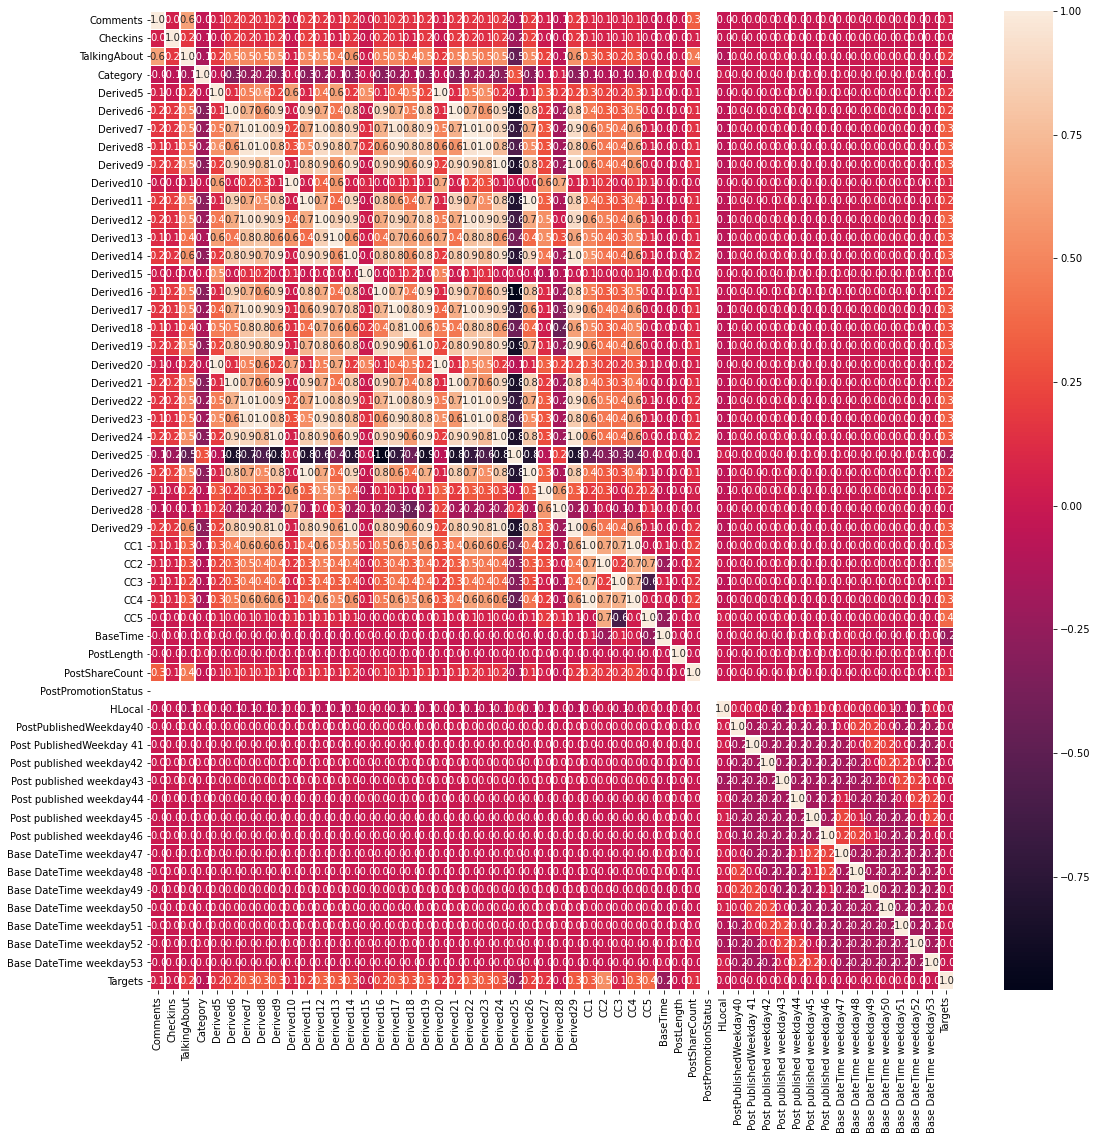

In [100]:
# Plotting a heatmap
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(train_data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
# To Show the heatmap
plt.show()

In [101]:
# Defining the input and output variables
x = train_data[['Comments','Checkins','TalkingAbout','Category','Derived5','Derived6','Derived7','Derived8','Derived9','Derived10','Derived11','Derived12','Derived13','Derived14','Derived15','Derived16','Derived17','Derived18','Derived19','Derived20','Derived21','Derived22','Derived23','Derived24','Derived25','Derived26','Derived27','Derived28','Derived29','CC1','CC2','CC3','CC4','CC5','BaseTime','PostLength','PostShareCount','PostPromotionStatus','HLocal','PostPublishedWeekday40','Post PublishedWeekday 41','Post published weekday42','Post published weekday43','Post published weekday44','Post published weekday45','Post published weekday46','Base DateTime weekday47','Base DateTime weekday48','Base DateTime weekday49','Base DateTime weekday50','Base DateTime weekday51','Base DateTime weekday52','Base DateTime weekday53']]
y = train_data['Targets']

In [104]:
# 3. Split the data into 90% training and 10% test sets.
# Splitting the dataset into train and test datsets into 90% an 10% respectively
x_train_data, x_test_data, y_train_data, y_test_data = train_test_split(x, y, test_size=0.1,random_state=1)

In [105]:
# Standardization of the input data
stdScalar = StandardScaler()
X_train_data_std = stdScalar.fit_transform(x_train_data)
X_test_data = stdScalar.transform(x_test_data)

In [109]:
# 4. Build a Linear Regressor and 􀂦nd the Mean Squared Error(MSE) and R2 for the test data
# Linear Regression Model
linModel = linear_model.LinearRegression() 
linModel.fit(X_train_data_std, y_train_data)

LinearRegression()

In [111]:
print(linModel.intercept_)
print(linModel.coef_)

7.392044549964865
[ 1.43330237e-01 -1.93791082e-01 -2.42341662e+00 -2.42116181e-01
 -1.83255240e+01  1.11778887e+01  9.67648046e+01  1.61059819e+01
 -2.42363073e+01 -2.29734638e+00 -2.22318148e+00 -4.12833461e+08
  2.97391219e+00 -2.21293786e+00  5.05524470e-01  5.05286277e+00
  3.50356788e+08  7.02593143e-01 -9.75333142e+00  1.54988674e+01
 -1.22523819e+01 -9.62719814e+01 -1.69214789e+01  2.85868513e+01
  2.51400373e-01  1.54406046e+00  1.93349264e+08  1.14033954e+00
  1.01610566e+00  7.88179866e+00 -3.03862219e+13  2.82968991e+13
 -1.08084370e+01  3.71333520e+13 -4.09838867e+00 -7.42187500e-02
  2.95166016e+00 -6.67167670e+12  8.09570312e-01 -3.00036610e+13
 -3.20788983e+13 -3.26184670e+13 -3.32997793e+13 -3.20537108e+13
 -3.22167363e+13 -3.14294352e+13  1.36492292e+13  1.32702676e+13
  1.34958287e+13  1.39577778e+13  1.39911098e+13  1.37090142e+13
  1.37843711e+13]


In [112]:
# Predicting the output
y_predcited = Linear_model.predict(X_test_data)
print(y_predcited)

[-14.43022108  11.12837267  17.60884142 ...   0.96040392  -4.45365858
  -3.18022108]


In [119]:
# Mean Square Error and Model Scores
print(metrics.mean_squared_error(y_test_data,y_predcited))
print(np.sqrt(metrics.mean_squared_error(y_test_data,y_predcited)))
print(r2_score(y_test_data,y_predcited ))

684.410967436207
26.161249347770205
0.3245565925529871


In [114]:
# 5. Build a Decision Tree Regressor and 􀂦nd the Mean Squared Error for the test data and plot the top 10 most important features.
# Decision tree Regression
tree_reg = tree.DecisionTreeRegressor(max_depth=6)
tree_reg.fit(X_train_data_std, y_train_data)

DecisionTreeRegressor(max_depth=6)

In [115]:
print(tree_reg.score(X_test_data,y_test_data))
y_pred = tree_reg.predict(X_test_data)

0.4664504352216271


In [116]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_data, y_pred))

Mean Squared Error: 540.6332636887569


In [117]:
importantFeatures = tree_reg.feature_importances_
print(importantFeatures)

[3.97192644e-03 1.77276266e-02 0.00000000e+00 1.35992570e-02
 5.65110851e-04 1.58726424e-03 1.48889506e-02 5.03765294e-03
 0.00000000e+00 1.06562896e-04 0.00000000e+00 3.44842224e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 7.05741371e-03 0.00000000e+00
 2.21231290e-03 0.00000000e+00 0.00000000e+00 3.84810387e-02
 0.00000000e+00 0.00000000e+00 2.07156604e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.50044665e-01 0.00000000e+00
 5.91085182e-02 2.76528428e-03 2.74154006e-01 0.00000000e+00
 1.65706025e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 6.43059535e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00]


[Text(173.58652173913043, 201.90857142857143, 'X[30] <= 1.912\nmse = 1287.217\nsamples = 36853\nvalue = 7.39'),
 Text(86.24739130434783, 170.84571428571428, 'X[34] <= -1.519\nmse = 516.858\nsamples = 35762\nvalue = 4.579'),
 Text(44.39739130434783, 139.78285714285715, 'X[36] <= 0.051\nmse = 6543.302\nsamples = 2037\nvalue = 32.996'),
 Text(23.290434782608695, 108.72, 'X[6] <= 0.02\nmse = 1571.228\nsamples = 1799\nvalue = 18.172'),
 Text(11.645217391304348, 77.65714285714284, 'X[30] <= -0.022\nmse = 573.428\nsamples = 1393\nvalue = 8.81'),
 Text(5.822608695652174, 46.59428571428572, 'X[7] <= -0.385\nmse = 410.263\nsamples = 1299\nvalue = 6.771'),
 Text(2.911304347826087, 15.531428571428563, 'mse = 33.77\nsamples = 879\nvalue = 2.873'),
 Text(8.73391304347826, 15.531428571428563, 'mse = 1099.857\nsamples = 420\nvalue = 14.929'),
 Text(17.46782608695652, 46.59428571428572, 'X[20] <= 0.894\nmse = 1976.67\nsamples = 94\nvalue = 36.989'),
 Text(14.556521739130435, 15.531428571428563, 'mse = 

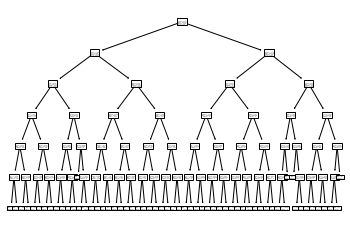

In [118]:
tree.plot_tree(tree_reg)

In [86]:
# 6. Build a GBM OR XgBoost Regressor model and 􀂦nd the Mean Squared Error for the test data.
# XG Boost Regressor Analysis
xgbRegressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)
xgbRegressor.fit(X_train_data_std, y_train_data)
# Predicted the output
y_pred = xgbRegressor.predict(X_test_data)


#7. What model gives the best results in terms of the MSE?
mean_squared_error(y_test_data, y_pred)

363.13131254355744

Linear Regression Model gives the best results in terms of the MSE